In [18]:
import pandas as pd
import numpy as np

In [2]:
import os
current_dir = os.getcwd()
data_dir = current_dir + "/data"

In [3]:
train_df = pd.read_csv(data_dir + "/train.csv")
train_df.set_index('id', inplace = True)

## Sanity Check

In [4]:
train_df.head()

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
id,,,,,,,,,,,
0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [5]:
train_df.describe()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,64.504738,59.859901,52.236449,1.348855,45.437406
std,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,1.300000,0.000000,0.000000,0.000000
25%,35.730000,39.410000,28.380000,0.000000,23.178350
50%,63.840000,60.050000,53.580000,1.000000,43.379460
75%,94.070000,79.530000,76.600000,2.000000,64.811580
max,325.240000,119.460000,119.910000,103.910000,119.970000


In [6]:
train_df.isnull().sum()

Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

Since, there's only one row with ``Number_of_Ads`` has a null value, I will drop that particular row from training data

In [7]:
train_df.dropna(subset=['Number_of_Ads'], inplace = True)

In [9]:
train_df.isnull().sum()

Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       0
Episode_Sentiment                   0
dtype: int64

In [12]:
train_df.duplicated().sum()

np.int64(0)

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 749999 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Podcast_Name                 749999 non-null  object 
 1   Episode_Title                749999 non-null  object 
 2   Episode_Length_minutes       662906 non-null  float64
 3   Genre                        749999 non-null  object 
 4   Host_Popularity_percentage   749999 non-null  float64
 5   Publication_Day              749999 non-null  object 
 6   Publication_Time             749999 non-null  object 
 7   Guest_Popularity_percentage  603969 non-null  float64
 8   Number_of_Ads                749999 non-null  float64
 9   Episode_Sentiment            749999 non-null  object 
dtypes: float64(4), object(6)
memory usage: 62.9+ MB


## Conclusion of sanity check:
Here, we notice a couple of points:
1. There are a lot of null values in the dataset. Especially in ``Episode_Length_minutes`` and ``Guest_Popularity_percentage``.
2. **Data-type validation**: We notice that there are a few ``object`` type.
3. ``Number_of_Ads`` field has values that differ drastically from the values in other non-null numeric columns.

## EDA
First, I will look for any outliers in non Null numerical features.
For this, I will use a **boxplot**

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

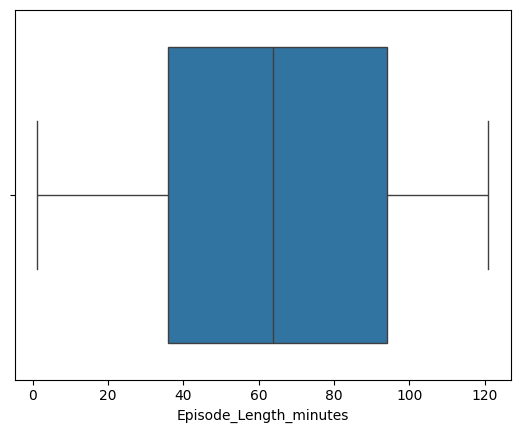

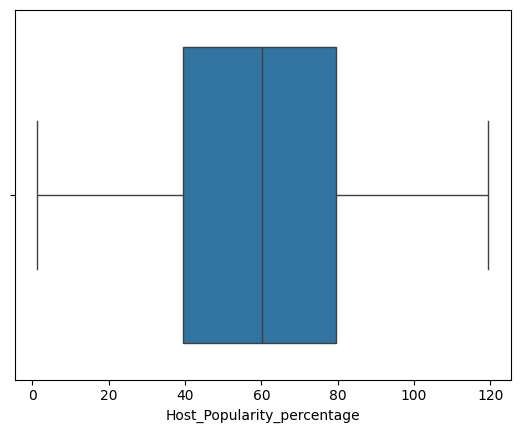

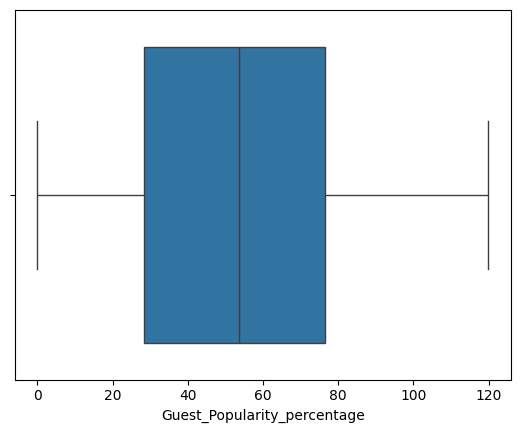

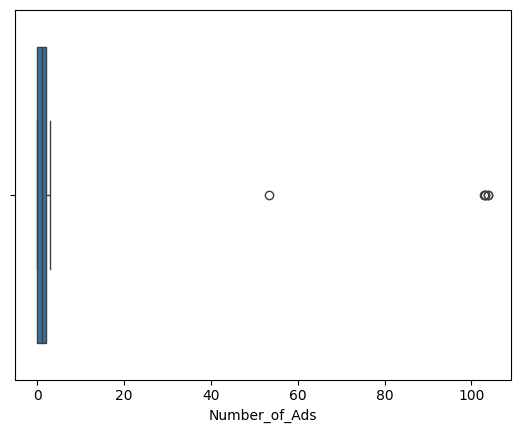

In [15]:
for i in X_train.select_dtypes(include = 'number').columns:
    sns.boxplot(data = X_train, x = i)
    plt.show()

### Thoughts?
Here we notice most of the non-null numeric features are pretty consistent, except the ``Number_of_Ads``, which has a few outliers. Here I will first calculate the IQR, and then subtract ``1.5 * iqr`` from lower whisker and add ``1.5 * iqr`` to the upper whisker

In [16]:
def wisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lw = q1 - (1.5 * iqr)
    uw = q3 + (1.5 * iqr)
    return lw, uw

In [20]:
lw, uw = wisker(train_df['Number_of_Ads'])
train_df['Number_of_Ads'] = np.where(train_df['Number_of_Ads'] < lw, lw, train_df['Number_of_Ads'])
train_df['Number_of_Ads'] = np.where(train_df['Number_of_Ads'] > uw, uw, train_df['Number_of_Ads'])

<Axes: xlabel='Number_of_Ads'>

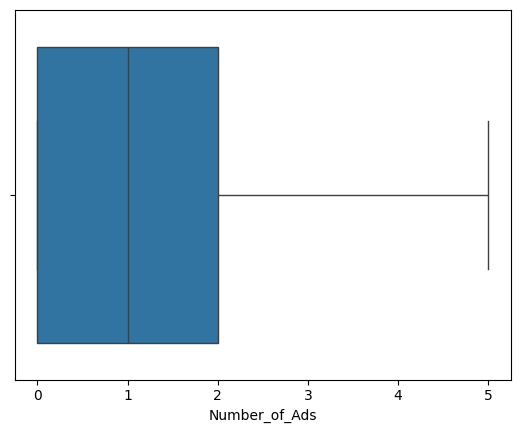

In [21]:
sns.boxplot(data = train_df, x = 'Number_of_Ads')

In [8]:
y = train_df.pop('Listening_Time_minutes')

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_df, y, test_size = 0.2, random_state = 42)

In [11]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((599999, 10), (150000, 10), (599999,), (150000,))